In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly as px

In [61]:
np.set_printoptions(legacy='1.25')

In [3]:
Coupons = pd.read_csv("/Users/vgarg2/Downloads/assignment5_1_starter 2/data/coupons.csv")

In [4]:
Coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
Coupons.shape

(12684, 26)

In [20]:
# 2. Investigate the dataset for missing or problematic data.

In [6]:
Coupons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [11]:
#Investigate the dataset for missing or problematic data.
missing_data = Coupons.isnull().sum()
missing_data = missing_data[missing_data != 0]

missing_data_per = Coupons.isnull().sum()*100/len(Coupons)
missing_data_per = missing_data_per[missing_data_per != 0]
missing_data_df = pd.DataFrame({'missing_data':missing_data, 'missing_data_per':missing_data_per})
missing_data_df

,missing_data,missing_data_per
car,12576,99.148534
Bar,107,0.843582
CoffeeHouse,217,1.710817
CarryAway,151,1.190476
RestaurantLessThan20,130,1.024913
Restaurant20To50,189,1.490066


In [19]:
# 3.Decide what to do about your missing data -- drop, replace, other...

In [12]:
# The 'Car' metric has over 99% of its values missing, so it is not contributing much value. Therefore, it would be better to drop
# this metric from further analysis.
Coupons.drop('car', axis = 1, inplace = True)
Coupons.shape

(12684, 25)

In [14]:
# Other metrics such as 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', and 'Restaurant20To50' have 2% missing values.
# Inspect the values to see which responses are most common in the surveys, and consider filling the missing values using the most 
# frequent response as the default.
Coupons['Bar'].value_counts()


Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

In [16]:
Coupons['Bar'] = Coupons['Bar'].fillna(Coupons['Bar'].value_counts().index[0])
Coupons['Bar'].value_counts()

Bar
never    5304
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

In [17]:
# updating the other metrics similar to 'bar'
Coupons['CoffeeHouse'] = Coupons['CoffeeHouse'].fillna(Coupons['CoffeeHouse'].value_counts().index[0])
Coupons['CarryAway'] = Coupons['CarryAway'].fillna(Coupons['CarryAway'].value_counts().index[0])
Coupons['RestaurantLessThan20'] = Coupons['RestaurantLessThan20'].fillna(Coupons['RestaurantLessThan20'].value_counts().index[0])
Coupons['Restaurant20To50'] = Coupons['Restaurant20To50'].fillna(Coupons['Restaurant20To50'].value_counts().index[0])

In [18]:
# confirming the Coupons Data has no null values
Coupons.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [21]:
# 4. What proportion of the total observations chose to accept the coupon?

In [131]:
Coupon_acceptance = Coupons.query("Y == 1")['Y'].value_counts().iloc[0]/Coupons['Y'].size
Coupon_acceptance

0.5684326710816777

In [237]:
#Coupon_acceptance_per = np.round(Coupon_acceptance * 100, 2)
#Coupon_acceptance_per = np.char.mod('%.2f%%', Coupon_acceptance)
print("The total observations chose to accept the coupon - ",f"{Coupon_acceptance*100:.2f}%")

The total observations chose to accept the coupon -  56.84%


In [71]:
# 5. Use a bar plot to visualize the coupon column.

[Text(0.5, 0, 'Coupon Type'), Text(0, 0.5, 'Total Count')]

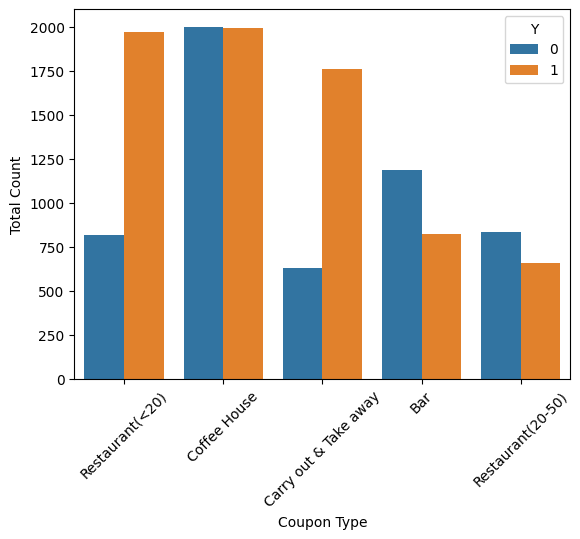

In [83]:
# Create the countplot
view = sns.countplot(Coupons, x = 'coupon', hue = 'Y')

# Rotate the x-axis labels
view.tick_params(axis='x', rotation=45)

# Set the labels
view.set(xlabel='Coupon Type', ylabel='Total Count')

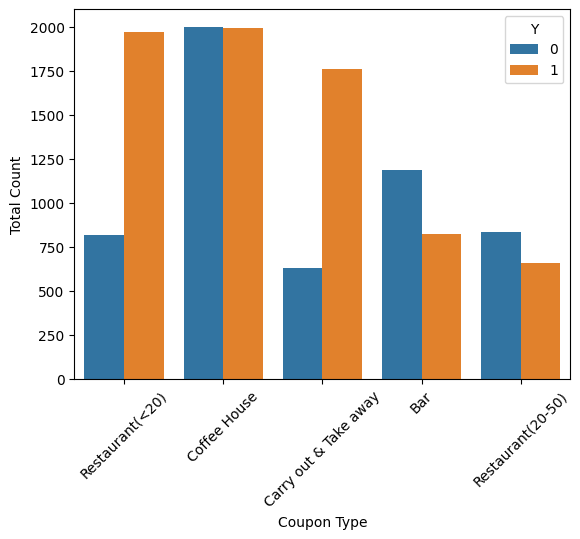

In [82]:
# Create the countplot
sns.countplot(data=Coupons, x='coupon', hue='Y')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Set the labels
plt.xlabel('Coupon Type')
plt.ylabel('Total Count')

# Show the plot
plt.show()

In [84]:
# 6.Use a histogram to visualize the temperature column.

In [86]:
Coupons['temperature'].value_counts() 

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

Text(0.5, 1.0, 'Visualize Temperature')

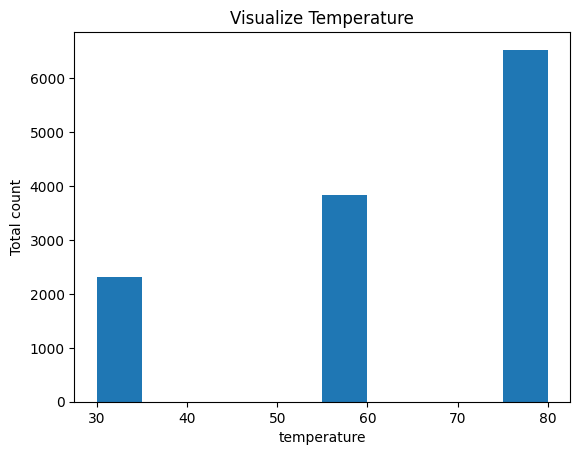

In [98]:
plt.hist(Coupons['temperature'])
plt.xlabel('temperature')
plt.ylabel('Total count')
plt.title('Visualize Temperature')

In [99]:
## Investigating the Bar Coupons
## Now, we will lead you through an exploration of just the bar related coupons.
# 1. Create a new DataFrame that contains just the bar coupons.

In [101]:
Bar_coupons = Coupons.query("coupon == 'Bar'")

In [102]:
Bar_coupons.shape

(2017, 25)

In [103]:
Bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


In [171]:
Bar_coupons.reset_index(drop=True)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
1,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
2,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
4,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
2013,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
2014,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
2015,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


Text(0, 0.5, 'Total Count')

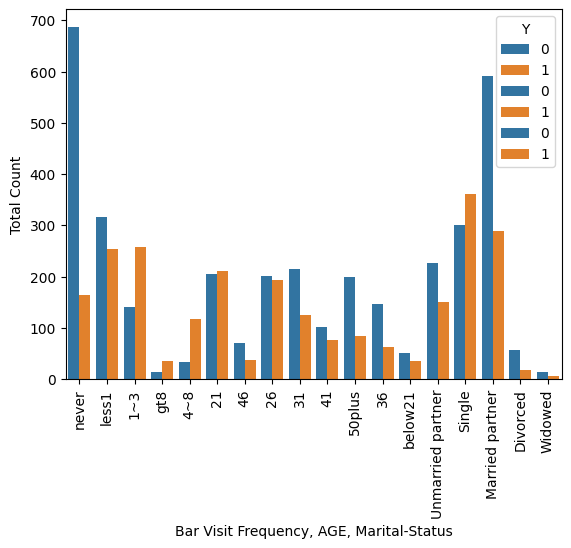

In [257]:
# Create the countplot
a = sns.countplot(data=Bar_coupons, x='Bar', hue='Y')
b = sns.countplot(data=Bar_coupons, x='age', hue='Y')
c = sns.countplot(data=Bar_coupons, x='maritalStatus', hue='Y')

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Set the labels
plt.xlabel('Bar Visit Frequency, AGE, Marital-Status')
plt.ylabel('Total Count')

# Show the plot
#plt.show()

In [259]:
# 2. What proportion of bar coupons were accepted?

In [258]:
Bar_coupon_acceptance = Bar_coupons.query("Y == 1")['Y'].value_counts().iloc[0]/Bar_coupons['Y'].size
Bar_coupon_acceptance
print("The total proportion of bar coupons chose that were accepted -", f"{Bar_coupon_acceptance*100:.2f}%")

The total proportion of bar coupons chose that were accepted - 41.00%


In [144]:
# 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

In [145]:
Bar_coupons['Bar'].value_counts()

Bar
never    851
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64

In [146]:
Bar_coupons.query("Y == 1")['Bar'].value_counts()

Bar
1~3      257
less1    253
never    164
4~8      117
gt8       36
Name: count, dtype: int64

In [147]:
Bar_morethan3 = ['4~8', 'gt8 ']

In [148]:
Bar_coupon_acceptance_3timesorless = None
Bar_coupon_acceptance_morethan3 = None
Bar_coupon_acceptance_morethan3 = Bar_coupons.query('Bar in @Bar_morethan3').query("Y == 1")['Y'].value_counts().iloc[0]/Bar_coupons.query('Bar in @Bar_morethan3')['Y'].size
Bar_coupon_acceptance_3timesorless = Bar_coupons.query('Bar != @Bar_morethan3').query("Y == 1")['Y'].value_counts().iloc[0]/Bar_coupons.query('Bar != @Bar_morethan3')['Y'].size

In [239]:
print ("The Bar coupon acceptance rate for those who went to a bar 3 or fewer times a month:", f"{Bar_coupon_acceptance_3timesorless*100:.2f}%")
print ("The Bar coupon acceptance rate for those who went to a bar more than 3 time a month:", f"{Bar_coupon_acceptance_morethan3*100:.2f}%")

The Bar coupon acceptance rate for those who went to a bar 3 or fewer times a month: 38.03%
The Bar coupon acceptance rate for those who went to a bar more than 3 time a month: 78.00%


In [150]:
# 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.
# Is there a difference?

In [151]:
Bar_coupons['age'].value_counts()

age
21         417
26         395
31         339
50plus     283
36         209
41         178
46         109
below21     87
Name: count, dtype: int64

In [152]:
Bar_morethan1 = ['1~3', '4~8', 'gt8']
Age_lessthan25 = ['21', 'below21']

In [179]:
# define conditions for bar coupon acceptence:

def coupon_acceptance_condition(Bar_coupons):
    if Bar_coupons['Bar'] in ['1~3', '4~8', 'gt8'] and Bar_coupons['age'] in ['26','31','50plus','36','41','46']:
        return 1
    else:
        return 0

#Bar_coupons_condition1 = pd.DataFrame({'Bar': Bar_coupons['Bar'], 'age':  Bar_coupons['Bar'] })
Bar_coupons['Acceptance_Condition1'] = Bar_coupons[['Bar','age']].apply(coupon_acceptance_condition, axis=1)
#Bar_coupons[['Bar','age','Acceptance_Condition1']]
Bar_coupons.loc[:, ('Bar','age','Acceptance_Condition1')].drop_duplicates()

/var/folders/z_/9p038pkx1n9_c5jbhhjrbnmh0000gr/T/ipykernel_52417/696151908.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bar_coupons['Acceptance_Condition1'] = Bar_coupons[['Bar','age']].apply(coupon_acceptance_condition, axis=1)


,Bar,age,Acceptance_Condition1
9,never,21,0
46,never,46,0
75,less1,46,0
90,1~3,21,0
112,1~3,26,1
141,never,26,0
156,gt8,26,1
195,less1,21,0
268,never,31,0
290,never,41,0


In [181]:
Bar_coupon_acceptance_morethan1_over25yrs = Bar_coupons.query('Acceptance_Condition1 == 1').query("Y == 1")['Y'].value_counts().iloc[0]/Bar_coupons.query('Acceptance_Condition1 == 1')['Y'].size
Bar_coupon_acceptance_allothers = Bar_coupons.query('Acceptance_Condition1 != 1').query("Y == 1")['Y'].value_counts().iloc[0]/Bar_coupons.query('Acceptance_Condition1 != 1')['Y'].size

print(Bar_coupon_acceptance_morethan1_over25yrs, Bar_coupon_acceptance_allothers)


0.6952380952380952 0.33500313087038197


In [198]:
print ("The bar coupon acceptance rate by drivers that meet 2 conditions -", f"{Bar_coupon_acceptance_morethan1_over25yrs*100:.2f}%")
print ("The bar coupon acceptance rate by all other drivers -", f"{Bar_coupon_acceptance_allothers*100:.2f}%")

The bar coupon acceptance rate by drivers that meet 2 conditions - 69.52%
The bar coupon acceptance rate by all other drivers - 33.50%


In [183]:
# 5.Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers
# that were not a kid and had occupations other than farming, fishing, or forestry.


In [185]:
Bar_coupons.dtypes

destination              object
passanger                object
weather                  object
temperature               int64
time                     object
coupon                   object
expiration               object
gender                   object
age                      object
maritalStatus            object
has_children              int64
education                object
occupation               object
income                   object
Bar                      object
CoffeeHouse              object
CarryAway                object
RestaurantLessThan20     object
Restaurant20To50         object
toCoupon_GEQ5min          int64
toCoupon_GEQ15min         int64
toCoupon_GEQ25min         int64
direction_same            int64
direction_opp             int64
Y                         int64
Acceptance_Condition1     int64
dtype: object

In [186]:
Bar_coupons['passanger'].value_counts()

passanger
Alone        1200
Friend(s)     337
Partner       274
Kid(s)        206
Name: count, dtype: int64

In [188]:
# had passengers that were not a kid
# Bar_coupons['passanger'] in ['Alone', 'Friend(s)', 'Partner']

In [187]:
Bar_coupons['occupation'].value_counts()

occupation
Unemployed                                   301
Student                                      251
Computer & Mathematical                      232
Sales & Related                              178
Education&Training&Library                   140
Management                                   119
Office & Administrative Support              105
Arts Design Entertainment Sports & Media     100
Business & Financial                          89
Retired                                       75
Food Preparation & Serving Related            48
Community & Social Services                   44
Healthcare Support                            44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                                         34
Architecture & Engineering                    27
Personal Care & Service                       27
Protective Service                            27
Construction & Extraction                     24
Life Phys

In [189]:
# had occupations other than farming, fishing, or forestry.
# Bar_coupons['occupation'] not in ['Farming Fishing & Forestry']

In [212]:
# define conditions for bar coupon acceptence:

def coupon_acceptance_condition2(Bar_coupons):
    if Bar_coupons['Bar'] in ['1~3', '4~8', 'gt8'] and Bar_coupons['passanger'] in ['Alone', 'Friend(s)', 'Partner'] and Bar_coupons['occupation'] not in ['Farming Fishing & Forestry']:
        return 1
    else:
        return 0

Bar_coupons['Acceptance_Condition2'] = Bar_coupons[['Bar','passanger','occupation']].apply(coupon_acceptance_condition2, axis=1)
Bar_coupons[['Bar','passanger','occupation','Acceptance_Condition2']].drop_duplicates()
#Bar_coupons.loc[:, ('Bar','passanger','occupation','Acceptance_Condition2')].drop_duplicates()

/var/folders/z_/9p038pkx1n9_c5jbhhjrbnmh0000gr/T/ipykernel_52417/1418482143.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bar_coupons['Acceptance_Condition2'] = Bar_coupons[['Bar','passanger','occupation']].apply(coupon_acceptance_condition2, axis=1)


,Bar,passanger,occupation,Acceptance_Condition2
9,never,Kid(s),Unemployed,0
13,never,Alone,Unemployed,0
24,never,Friend(s),Architecture & Engineering,0
35,never,Alone,Architecture & Engineering,0
46,never,Friend(s),Student,0
...,...,...,...,...
12196,4~8,Kid(s),Computer & Mathematical,0
12415,1~3,Kid(s),Protective Service,0
12417,1~3,Friend(s),Protective Service,1
12426,1~3,Partner,Protective Service,1


In [194]:
# calculate a.total size that meets 3 conditions and accept bar coupon 
# calculate b.total size that meets 3 conditions
# calculate c.total size that 'does not' meet 3 conditions and accept bar coupon 
# calculate d.total size that 'does not' meet 3 conditions

print("A. Total count that meets 3 conditions and accept bar coupon-", Bar_coupons.query('Acceptance_Condition2 == 1').query("Y == 1")['Y'].value_counts().iloc[0])
print("B. Total count that meets 3 conditions-", Bar_coupons.query('Acceptance_Condition2 == 1')['Y'].size)
print("C. Total count that 'does not' meet 3 conditions and accept bar coupon-", Bar_coupons.query('Acceptance_Condition2 != 1').query("Y == 1")['Y'].value_counts().iloc[0])
print("D. Total count that 'does not' meet 3 conditions-",Bar_coupons.query('Acceptance_Condition2 != 1')['Y'].size)

A. Total count that meets 3 conditions and accept bar coupon- 393
B. Total count that meets 3 conditions- 551
C. Total count that 'does not' meet 3 conditions and accept bar coupon- 434
D. Total count that 'does not' meet 3 conditions- 1466


In [197]:
# the acceptance rate by drivers who go to bars more than once a month and had passengers 
# that were not a kid and had occupations other than farming, fishing, or forestry = A/B
Bar_coupon_acceptance_morethan1_nokids_occup = Bar_coupons.query('Acceptance_Condition2 == 1').query("Y == 1")['Y'].value_counts().iloc[0]/Bar_coupons.query('Acceptance_Condition2 == 1')['Y'].size

# the acceptance rate by all other drivers = C/D
Bar_coupon_acceptance_allothers_condition2 = Bar_coupons.query('Acceptance_Condition2 != 1').query("Y == 1")['Y'].value_counts().iloc[0]/Bar_coupons.query('Acceptance_Condition2 != 1')['Y'].size

print("The acceptance rate by drivers that meet 3 conditions - ", f"{Bar_coupon_acceptance_morethan1_nokids_occup*100:.2f}%")
print("The acceptance rate by all other drivers - ", f"{Bar_coupon_acceptance_allothers_condition2*100:.2f}%")


The acceptance rate by drivers that meet 3 conditions -  71.32%
The acceptance rate by all other drivers -  29.60%


In [199]:
# 6. Compare the acceptance rates between those drivers who:
# 6a. go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
# 6b. go to bars more than once a month and are under the age of 30 OR
# 6c. go to cheap restaurants more than 4 times a month and income is less than 50K.

In [200]:
# 6a.
Bar_coupons.dtypes

destination              object
passanger                object
weather                  object
temperature               int64
time                     object
coupon                   object
expiration               object
gender                   object
age                      object
maritalStatus            object
has_children              int64
education                object
occupation               object
income                   object
Bar                      object
CoffeeHouse              object
CarryAway                object
RestaurantLessThan20     object
Restaurant20To50         object
toCoupon_GEQ5min          int64
toCoupon_GEQ15min         int64
toCoupon_GEQ25min         int64
direction_same            int64
direction_opp             int64
Y                         int64
Acceptance_Condition1     int64
Acceptance_Condition2     int64
dtype: object

In [202]:
# 6a. go to bars more than once a month, had passengers that were not a kid, and were not widowed
Bar_coupons['maritalStatus'].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

In [222]:
# 6a. go to bars more than once a month, had passengers that were not a kid, and were not widowed
# define conditions for bar coupon acceptence:

def coupon_acceptance_condition_6a(Bar_coupons):
    if Bar_coupons['Bar'] in ['1~3', '4~8', 'gt8'] and Bar_coupons['passanger'] in ['Alone', 'Friend(s)', 'Partner'] and Bar_coupons['maritalStatus'] not in ['Widowed']:
        return 1
    else:
        return 0

#Bar_coupons_condition1 = pd.DataFrame({'Bar': Bar_coupons['Bar'], 'age':  Bar_coupons['Bar'] })
Bar_coupons['Acceptance_Condition1'] = Bar_coupons[['Bar','passanger','maritalStatus']].apply(coupon_acceptance_condition_6a, axis=1)
Bar_coupons[['Bar','passanger','maritalStatus','Acceptance_Condition1']].query('Acceptance_Condition1 == 1').drop_duplicates()
Bar_coupons.loc[:, ('Bar','passanger','maritalStatus','Acceptance_Condition1')].drop_duplicates()

/var/folders/z_/9p038pkx1n9_c5jbhhjrbnmh0000gr/T/ipykernel_52417/1566908762.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bar_coupons['Acceptance_Condition1'] = Bar_coupons[['Bar','passanger','maritalStatus']].apply(coupon_acceptance_condition_6a, axis=1)


,Bar,passanger,maritalStatus,Acceptance_Condition1
9,never,Kid(s),Unmarried partner,0
13,never,Alone,Unmarried partner,0
24,never,Friend(s),Single,0
35,never,Alone,Single,0
75,less1,Kid(s),Married partner,0
...,...,...,...,...
8768,1~3,Partner,Single,1
11824,less1,Friend(s),Widowed,0
11828,less1,Alone,Widowed,0
11831,less1,Partner,Widowed,0


In [223]:
# 6b. go to bars more than once a month and are under the age of 30
Bar_coupons['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [226]:
# 6b. go to bars more than once a month and are under the age of 30
# define conditions for bar coupon acceptence:

def coupon_acceptance_condition_6b(Bar_coupons):
    if Bar_coupons['Bar'] in ['1~3', '4~8', 'gt8'] and Bar_coupons['age'] in ['21','26','below21']:
        return 1
    else:
        return 0

#Bar_coupons_condition1 = pd.DataFrame({'Bar': Bar_coupons['Bar'], 'age':  Bar_coupons['Bar'] })
Bar_coupons['Acceptance_Condition2'] = Bar_coupons[['Bar','age']].apply(coupon_acceptance_condition_6b, axis=1)
Bar_coupons[['Bar','age','Acceptance_Condition2']].query('Acceptance_Condition2 == 1').drop_duplicates()
#Bar_coupons.loc[:, ('Bar','age','Acceptance_Condition2')].drop_duplicates()

/var/folders/z_/9p038pkx1n9_c5jbhhjrbnmh0000gr/T/ipykernel_52417/1854578079.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bar_coupons['Acceptance_Condition2'] = Bar_coupons[['Bar','age']].apply(coupon_acceptance_condition_6b, axis=1)


,Bar,age,Acceptance_Condition2
90,1~3,21,1
112,1~3,26,1
156,gt8,26,1
591,4~8,26,1
1774,4~8,21,1
2984,gt8,21,1
6517,1~3,below21,1
11498,gt8,below21,1


In [227]:
# 6c. go to cheap restaurants more than 4 times a month and income is less than 50K
Bar_coupons['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [228]:
# 6c. go to cheap restaurants more than 4 times a month and income is less than 50K
Bar_coupons['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [229]:
# 6c. go to cheap restaurants more than 4 times a month and income is less than 50K
# define conditions for bar coupon acceptence:

def coupon_acceptance_condition_6c(Bar_coupons):
    if Bar_coupons['RestaurantLessThan20'] in ['4~8', 'gt8'] and Bar_coupons['income'] in ['$37500 - $49999','$12500 - $24999','$25000 - $37499','Less than $12500']:
        return 1
    else:
        return 0

Bar_coupons['Acceptance_Condition3'] = Bar_coupons[['RestaurantLessThan20','income']].apply(coupon_acceptance_condition_6c, axis=1)
Bar_coupons[['RestaurantLessThan20','income','Acceptance_Condition3']].query('Acceptance_Condition3 == 1').drop_duplicates()
#Bar_coupons.loc[:, ('Bar','age','Acceptance_Condition2')].drop_duplicates()

/var/folders/z_/9p038pkx1n9_c5jbhhjrbnmh0000gr/T/ipykernel_52417/1337651441.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bar_coupons['Acceptance_Condition3'] = Bar_coupons[['RestaurantLessThan20','income']].apply(coupon_acceptance_condition_6c, axis=1)


,RestaurantLessThan20,income,Acceptance_Condition3
9,4~8,$37500 - $49999,1
156,gt8,$37500 - $49999,1
620,gt8,$25000 - $37499,1
752,4~8,$25000 - $37499,1
1014,4~8,$12500 - $24999,1
2082,gt8,$12500 - $24999,1
2097,4~8,Less than $12500,1
2119,gt8,Less than $12500,1


In [231]:
# confirming the data presence 
Bar_coupons[['Acceptance_Condition1','Acceptance_Condition2','Acceptance_Condition3']].query('Acceptance_Condition3 == 1').drop_duplicates()

,Acceptance_Condition1,Acceptance_Condition2,Acceptance_Condition3
9,0,0,1
156,1,1,1
752,1,0,1
1642,0,1,1


In [232]:
# 6. Compare the acceptance rates between those drivers who:
# 6a. go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
# 6b. go to bars more than once a month and are under the age of 30 OR
# 6c. go to cheap restaurants more than 4 times a month and income is less than 50K.

In [233]:
# calculate a.total size that meets condition 1 and accept bar coupon 
# calculate b.total size that meets condition 1
# calculate c.total size that meets condition 2 and accept bar coupon 
# calculate d.total size that meets condition 2
# calculate e.total size that meets condition 3 and accept bar coupon 
# calculate f.total size that meets condition 3

print("A. Total count that meets condition 1 and accept bar coupon -", Bar_coupons.query('Acceptance_Condition1 == 1').query("Y == 1")['Y'].value_counts().iloc[0])
print("B. Total count that that meets condition 1 -", Bar_coupons.query('Acceptance_Condition1 == 1')['Y'].size)
print("C. Total count that meets condition 2 and accept bar coupon -", Bar_coupons.query('Acceptance_Condition2 == 1').query("Y == 1")['Y'].value_counts().iloc[0])
print("D. Total count that that meets condition 2 -", Bar_coupons.query('Acceptance_Condition2 == 1')['Y'].size)
print("E. Total count that meets condition 3 and accept bar coupon -", Bar_coupons.query('Acceptance_Condition3 == 1').query("Y == 1")['Y'].value_counts().iloc[0])
print("F. Total count that that meets condition 3 -", Bar_coupons.query('Acceptance_Condition3 == 1')['Y'].size)

A. Total count that meets condition 1 and accept bar coupon - 393
B. Total count that that meets condition 1 - 551
C. Total count that meets condition 2 and accept bar coupon - 249
D. Total count that that meets condition 2 - 345
E. Total count that meets condition 3 and accept bar coupon - 156
F. Total count that that meets condition 3 - 344


In [234]:
# the acceptance rate by drivers for condition 1 = A/B
Bar_coupon_acceptance_condition1 = Bar_coupons.query('Acceptance_Condition1 == 1').query("Y == 1")['Y'].value_counts().iloc[0]/Bar_coupons.query('Acceptance_Condition1 == 1')['Y'].size

# the acceptance rate by drivers for condition 2 = C/D
Bar_coupon_acceptance_condition2 = Bar_coupons.query('Acceptance_Condition2 == 1').query("Y == 1")['Y'].value_counts().iloc[0]/Bar_coupons.query('Acceptance_Condition2 == 1')['Y'].size

# the acceptance rate by drivers for condition 3 = E/F
Bar_coupon_acceptance_condition3 = Bar_coupons.query('Acceptance_Condition3 == 1').query("Y == 1")['Y'].value_counts().iloc[0]/Bar_coupons.query('Acceptance_Condition3 == 1')['Y'].size

print("The acceptance rate by drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed - ", f"{Bar_coupon_acceptance_condition1*100:.2f}%")
print("The acceptance rate by drivers who go to bars more than once a month and are under the age of 30 - ", f"{Bar_coupon_acceptance_condition2*100:.2f}%")
print("The acceptance rate by drivers who go to cheap restaurants more than 4 times a month and income is less than 50K - ", f"{Bar_coupon_acceptance_condition3*100:.2f}%")


The acceptance rate by drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed -  71.32%
The acceptance rate by drivers who go to bars more than once a month and are under the age of 30 -  72.17%
The acceptance rate by drivers who go to cheap restaurants more than 4 times a month and income is less than 50K -  45.35%


In [235]:
# 7. Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [240]:
# All observations/results -
print('The total observations chose to accept the coupon -  56.84%')
print('The total proportion of bar coupons chose that were accepted - 41.00%')
print('The Bar coupon acceptance rate for those who went to a bar 3 or fewer times a month: 38.03%')
print('The Bar coupon acceptance rate for those who went to a bar more than 3 time a month: 78.00%')
print('The bar coupon acceptance rate by drivers  who go to a bar more than once a month and are over the age of 25 - 69.52%')
print('The bar coupon acceptance rate by drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry - 71.32%')
print("The acceptance rate by drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed - ", f"{Bar_coupon_acceptance_condition1*100:.2f}%")
print("The acceptance rate by drivers who go to bars more than once a month and are under the age of 30 - ", f"{Bar_coupon_acceptance_condition2*100:.2f}%")
print("The acceptance rate by drivers who go to cheap restaurants more than 4 times a month and income is less than 50K - ", f"{Bar_coupon_acceptance_condition3*100:.2f}%")
      

The total observations chose to accept the coupon -  56.84%
The total proportion of bar coupons chose that were accepted - 41.00%
The Bar coupon acceptance rate for those who went to a bar 3 or fewer times a month: 38.03%
The Bar coupon acceptance rate for those who went to a bar more than 3 time a month: 78.00%
The bar coupon acceptance rate by drivers  who go to a bar more than once a month and are over the age of 25 - 69.52%
The bar coupon acceptance rate by drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry - 71.32%
The acceptance rate by drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed -  71.32%
The acceptance rate by drivers who go to bars more than once a month and are under the age of 30 -  72.17%
The acceptance rate by drivers who go to cheap restaurants more than 4 times a month and income is less than 50K -  45.35%


In [241]:
# Conclusion:
# The findings suggest that the frequency of visiting bars is a significant predictor of bar coupon acceptance, especially among those 
# who frequent bars more than three times a month. Age also plays a role, with higher acceptance noted among older frequent bar-goers.
# Socio-demographic factors such as occupation, passenger composition, and marital status, provide insightful trends but appear less 
# impactful compared to the frequency of visits and age. Promotional strategies might be more effective if they are targeted toward frequent,
# older bar-goers, potentially customized by socio-demographic profiles.
